## Access Animal CTD Satellite Relay Tagging Delayed QC data in Parquet
A jupyter notebook to show how to access and plot the AODN animal_ctd_satellite_relay_tagging_delayed_qc dataset available as a [Parquet](https://parquet.apache.org) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/95d6314c-cfc7-40ae-b439-85f14541db71).

In [1]:
dataset_name = "animal_ctd_satellite_relay_tagging_delayed_qc"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 62ms


✅ Local version 0.2.1 is up to date (remote: 0.2.1)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

## Get partition keys
Partitioning in Parquet involves organising data files based on the values of one or more columns, known as partition keys. When data is written to Parquet files with partitioning enabled, the files are physically stored in a directory structure that reflects the partition keys. This directory structure makes it easier to retrieve and process specific subsets of data based on the partition keys.

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.parquet'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 213 ms, sys: 43.7 ms, total: 257 ms
Wall time: 7.32 s


In [5]:
aodn_dataset.dataset.partitioning.schema

timestamp: int32
PLATFORM_NUMBER: int32
polygon: string

## List unique partition values

In [6]:
%%time
unique_partition_value = aodn_dataset.get_unique_partition_values('PLATFORM_NUMBER')
print(list(unique_partition_value)) 

['30378', '81060', '62976', '52650', '9786', '50290', '22398', '54900', '81096', '92754', '22392', '48252', '62946', '97692', '81144', '82512', '92916', '82116', '10272', '103218', '95826', '81042', '22416', '22386', '12054', '95820', '87876', '34674', '58812', '50286', '58800', '39126', '19824', '34626', '92616', '50299', '81018', '48270', '92940', '26442', '37032', '22374', '47094', '103332', '57636', '81264', '34590', '22512', '22530', '6834', '26502', '50292', '8682', '62970', '15750', '97644', '95814', '24858', '48138', '105246', '81306', '81006', '62982', '37014', '81318', '81312', '34686', '12048', '22662', '13902', '97590', '52656', '57642', '48282', '57654', '24900', '22440', '14406', '92682', '48168', '90372', '30390', '26436', '26406', '24882', '50288', '97782', '82518', '103278', '103404', '26484', '92952', '22434', '22542', '92958', '48360', '48384', '82326', '103260', '97758', '90402', '97686', '36996', '81120', '92598', '22458', '34662', '103380', '97740', '97734', '3351

## Visualise Spatial Extent of the dataset
In this section, we're plotting the polygons where data exists. This helps then with creating a bounding box where there is data

/home/lbesnard/miniforge3/envs/AodnCloudOptimised/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


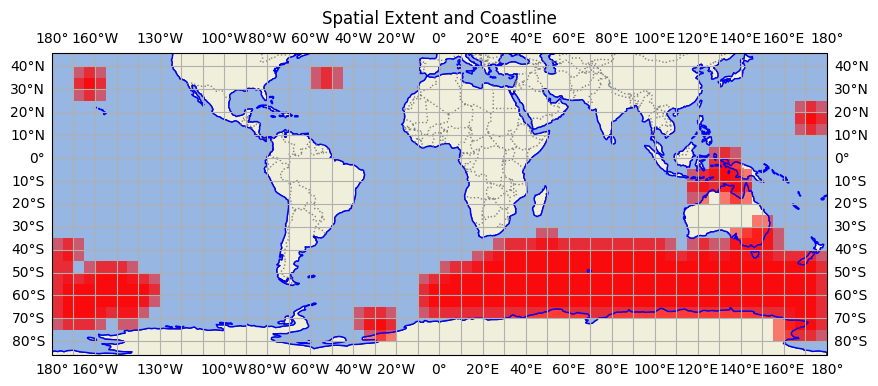

In [7]:
aodn_dataset.plot_spatial_extent()

## Get Temporal Extent of the dataset

Similary to the spatial extent, we're retrieving the minimum and maximum timestamp partition values of the dataset.

In [8]:
aodn_dataset.get_temporal_extent()

(Timestamp('2004-01-27 11:49:00'), Timestamp('2024-02-22 12:45:00'))

## Read Metadata

For all parquet dataset, we create a sidecar file in the root of the dataset named **_common_matadata**. This contains the variable attributes.

In [9]:
metadata = aodn_dataset.get_metadata()
metadata

2025-06-11 13:01:46,150 - aodn.GetAodn - INFO - Retrieving metadata for aodn-cloud-optimised/animal_ctd_satellite_relay_tagging_delayed_qc.parquet
2025-06-11 13:01:46,345 - aodn.GetAodn - WARNING - Old 'dataset_metadata' deprecated key found in parquet schema. Renamed to 'global_attributes'. Dataset should be updated


{'DATA_TYPE': {'type': 'string', 'comment': 'Data type'},
 'FORMAT_VERSION': {'type': 'string', 'comment': 'File format version'},
 'HANDBOOK_VERSION': {'type': 'string', 'comment': 'Data handbook version'},
 'REFERENCE_DATE_TIME': {'type': 'string',
  'comment': 'Date of reference for Julian days',
  'conventions': 'YYYYMMDDHHMISS'},
 'DATE_CREATION': {'type': 'string',
  'comment': 'Date of file creation',
  'conventions': 'YYYYMMDDHHMISS'},
 'DATE_UPDATE': {'type': 'string',
  'long_name': 'Date of update of this file',
  'conventions': 'YYYYMMDDHHMISS'},
 'PLATFORM_NUMBER': {'type': 'string',
  'long_name': 'Float unique identifier',
  'conventions': 'WMO float identifier : A9IIIII'},
 'PROJECT_NAME': {'type': 'string', 'comment': 'Name of the project'},
 'PI_NAME': {'type': 'string',
  'comment': 'Name of the principal investigator'},
 'STATION_PARAMETERS': {'type': 'string',
  'long_name': 'List of available parameters for the station',
  'conventions': 'Argo reference table 3'},

# Data Query and Plot

## Create a TIME and BoundingBox filter

In [10]:
%%time
df = aodn_dataset.get_data(date_start='2018-12-01', date_end='2019-03-01', lat_min=-60, lat_max=-50, lon_min=100, lon_max=120)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217000 entries, 0 to 216999
Data columns (total 72 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   PROJECT_NAME                  217000 non-null  object        
 1   PI_NAME                       217000 non-null  object        
 2   CYCLE_NUMBER                  217000 non-null  float64       
 3   DIRECTION                     217000 non-null  object        
 4   DATA_CENTRE                   217000 non-null  object        
 5   DC_REFERENCE                  217000 non-null  object        
 6   DATA_STATE_INDICATOR          217000 non-null  object        
 7   DATA_MODE                     217000 non-null  object        
 8   INST_REFERENCE                217000 non-null  object        
 9   WMO_INST_TYPE                 217000 non-null  object        
 10  JULD                          217000 non-null  datetime64[ns]
 11  JULD_QC      

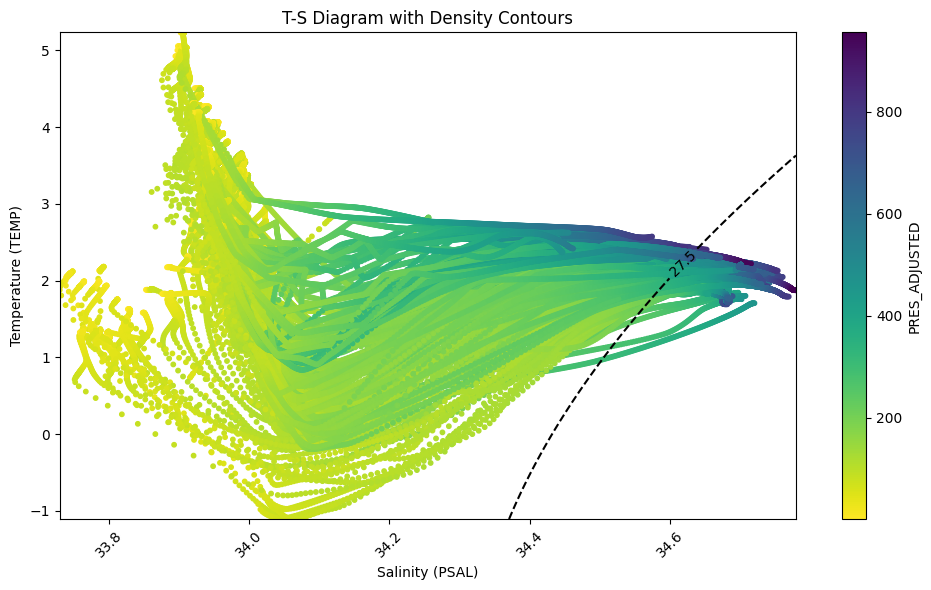

In [11]:
from DataQuery import plot_ts_diagram
plot_ts_diagram(df, temp_col='TEMP_ADJUSTED', psal_col='PSAL_ADJUSTED', z_col='PRES_ADJUSTED')

## Create a TIME and scalar/number filter

In [12]:
%%time
df = aodn_dataset.get_data(date_start='2006-07-12', date_end='2023-02-05', scalar_filter={'PLATFORM_NUMBER': 12054})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PROJECT_NAME                  19152 non-null  object        
 1   PI_NAME                       19152 non-null  object        
 2   CYCLE_NUMBER                  19152 non-null  float64       
 3   DIRECTION                     19152 non-null  object        
 4   DATA_CENTRE                   19152 non-null  object        
 5   DC_REFERENCE                  19152 non-null  object        
 6   DATA_STATE_INDICATOR          19152 non-null  object        
 7   DATA_MODE                     19152 non-null  object        
 8   INST_REFERENCE                19152 non-null  object        
 9   WMO_INST_TYPE                 19152 non-null  object        
 10  JULD                          19152 non-null  datetime64[ns]
 11  JULD_QC                     

In [13]:
%%time
target_platform = 19866
df = aodn_dataset.get_data(date_start='2006-07-12', date_end='2023-02-05', scalar_filter={'PLATFORM_NUMBER': target_platform})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14705 entries, 0 to 14704
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PROJECT_NAME                  14705 non-null  object        
 1   PI_NAME                       14705 non-null  object        
 2   CYCLE_NUMBER                  14705 non-null  float64       
 3   DIRECTION                     14705 non-null  object        
 4   DATA_CENTRE                   14705 non-null  object        
 5   DC_REFERENCE                  14705 non-null  object        
 6   DATA_STATE_INDICATOR          14705 non-null  object        
 7   DATA_MODE                     14705 non-null  object        
 8   INST_REFERENCE                14705 non-null  object        
 9   WMO_INST_TYPE                 14705 non-null  object        
 10  JULD                          14705 non-null  datetime64[ns]
 11  JULD_QC                     

In [14]:
df

,PROJECT_NAME,PI_NAME,CYCLE_NUMBER,DIRECTION,DATA_CENTRE,DC_REFERENCE,DATA_STATE_INDICATOR,DATA_MODE,INST_REFERENCE,WMO_INST_TYPE,...,LIGHT_QC,LIGHT_ADJUSTED,LIGHT_ADJUSTED_ERROR,LIGHT_ADJUSTED_QC,PARAMETER,SCIENTIFIC_CALIB_EQUATION,SCIENTIFIC_CALIB_COEFFICIENT,timestamp,PLATFORM_NUMBER,polygon
0,...,...,624.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,0103000000010000000500000000000000000064400000...
1,...,...,624.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,0103000000010000000500000000000000000064400000...
2,...,...,624.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,0103000000010000000500000000000000000064400000...
3,...,...,624.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,0103000000010000000500000000000000000064400000...
4,...,...,624.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,0103000000010000000500000000000000000064400000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14700,...,...,276.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,010300000001000000050000000000000000C062400000...
14701,...,...,276.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,010300000001000000050000000000000000C062400000...
14702,...,...,276.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,010300000001000000050000000000000000C062400000...
14703,...,...,276.0,A,IF,,,D,...,995,...,None,NaN,NaN,None,None,None,None,1262304000,19866,010300000001000000050000000000000000C062400000...


/tmp/ipykernel_2278965/2063257431.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


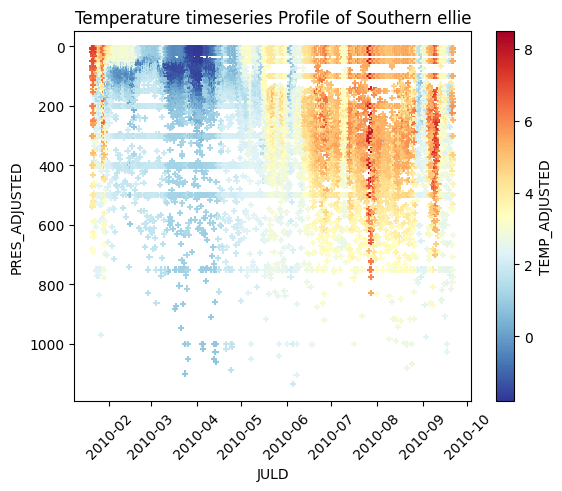

In [15]:
import matplotlib.pyplot as plt
ax = df.plot.scatter(x='JULD', y='PRES_ADJUSTED', c='TEMP_ADJUSTED', marker='+', linestyle="None", cmap='RdYlBu_r', title=f'Temperature timeseries Profile of {df.species.unique()[0]}')

ax.invert_yaxis()

# Rotate x-axis labels at 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()


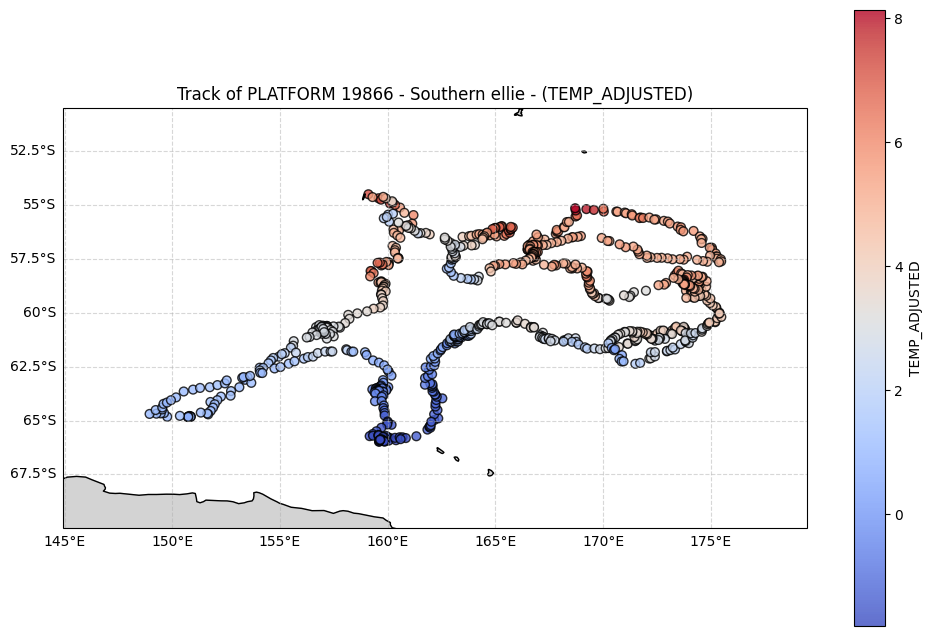

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Filter for PRES_ADJUSTED < 10 , close to surface
df_filtered = df[df["PRES_ADJUSTED"] < 10]

# Get min/max lat/lon for setting the extent and zoom
min_lon, max_lon = df_filtered["LONGITUDE"].min(), df_filtered["LONGITUDE"].max()
min_lat, max_lat = df_filtered["LATITUDE"].min(), df_filtered["LATITUDE"].max()

padding = 4 
ax_extent = [min_lon - padding, max_lon + padding, min_lat - padding, max_lat + padding]

# Create figure and axis with a map projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_title(f"Track of PLATFORM {target_platform} - {df.species.unique()[0]} - (TEMP_ADJUSTED)")

ax.set_extent(ax_extent, crs=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, color="lightgray")

# Add labels
gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Scatter plot
sc = ax.scatter(
    df_filtered["LONGITUDE"], df_filtered["LATITUDE"], 
    c=df_filtered["TEMP_ADJUSTED"], cmap="coolwarm", edgecolor="k", s=40, alpha=0.8
)
cbar = plt.colorbar(sc, label="TEMP_ADJUSTED")
cbar.ax.tick_params(labelsize=10) 

plt.show()

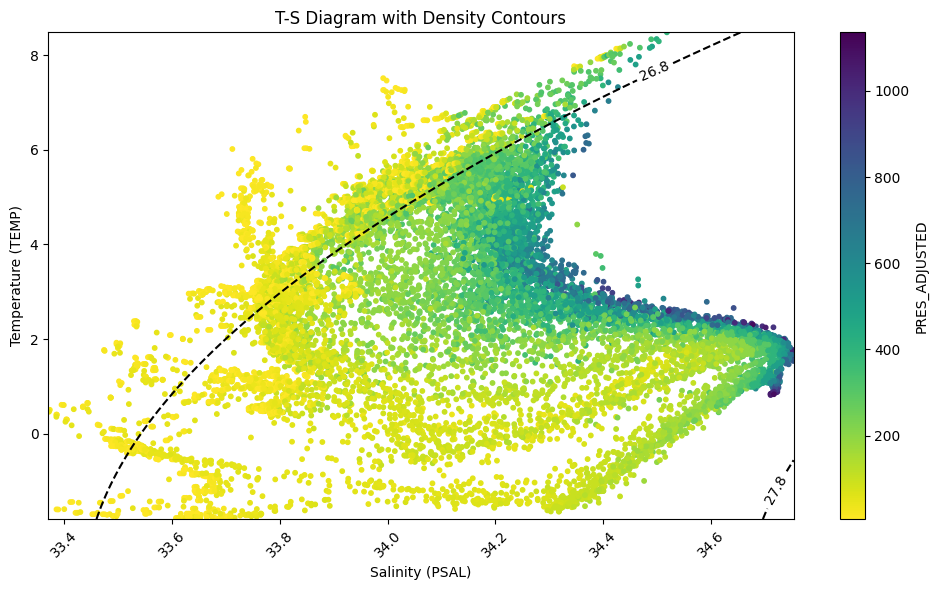

In [17]:
plot_ts_diagram(df, temp_col='TEMP_ADJUSTED', psal_col='PSAL_ADJUSTED', z_col='PRES_ADJUSTED')